<a href="https://colab.research.google.com/github/RenanDevData/estudosdePandas/blob/master/Estudo_AirBNB_S%C3%A3o_Francisco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto 1 - Análise de Dados - AirBnB - San Francisco
O Airbnb é uma empresa americana que opera on-line um mercado para estadias e experiências de casas de família de curto e longo prazo. Ela foi iniciada com a locação de um colchão de ar numa sala que se transformou em uma espécie de pousada em 2007. No ano seguinte o produto foi oferecido com café da manhã para quem não conseguia reservas no saturado mercado de hospedagem. Hoje o Airbnb é considerada uma das maiores empresas hoteleiras do mundo sem possuir nenhum hotel próprio.

Em 2020 a empresa valia cerca de U$ 18 bilhões, e em 2023 contava com pouco mais de 6000 funcionários.

Com relação à ciência de dados, uma das iniciativas do Airbnb é disponibilizar seus dados de locações de algumas das principais cidades do mundo. Por meio do portal Inside Airbnb é possível acessá-los. No nosso caso, analisaremos os dados de locações da cidade de San Francisco, na Califórnia, EUA.

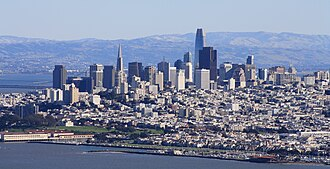

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure.format = 'svg'
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
# Ler base de dados disponivel
df = pd.read_csv('https://raw.githubusercontent.com/wallacecarlis/arquivos_ml/main/listings.csv')

In [3]:
# validando a quantidade de colunas e linhas
df.shape


(8361, 18)

In [4]:
# pegando o nome das colunas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
# validando tipos de dados nas colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8361 non-null   int64  
 1   name                            8361 non-null   object 
 2   host_id                         8361 non-null   int64  
 3   host_name                       8361 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8361 non-null   object 
 6   latitude                        8361 non-null   float64
 7   longitude                       8361 non-null   float64
 8   room_type                       8361 non-null   object 
 9   price                           6774 non-null   float64
 10  minimum_nights                  8361 non-null   int64  
 11  number_of_reviews               8361 non-null   int64  
 12  last_review                     61

In [10]:
# validando as primeiras linhas da base
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1094764,San Francisco Presidio Paradise!,172460,Leila,Inner Richmond,37.788140,-122.465470,Entire home/apt,150.0,30,1,2021-10-31,0.03,2,365,0,NaN
1,38047206,52 Vesta home,92965890,唱,Bayview,37.729800,-122.400960,Private room,NaN,90,0,NaN,NaN,1,0,0,NaN
2,43475468,Beautiful Mission District Home and Backyard,65136730,Ryan,Mission,37.757210,-122.412450,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
3,648549709021440854,LuxoStays | ! Quiet Rm #Private Bathrm & VIEW,226555948,Gi'Angelo,Excelsior,37.726761,-122.408522,Private room,69.0,30,6,2024-01-13,0.33,13,216,3,2022-003280STR
4,47918229,"Blueground | Marina District, w/d, nr parks",107434423,Blueground,Marina,37.803660,-122.445180,Entire home/apt,246.0,31,0,NaN,NaN,183,341,0,NaN


In [9]:
# validando valor vazios nan
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,1587
minimum_nights,0


In [11]:
# limpando valores nan da coluna neighbourhood_group
df.drop('neighbourhood_group',axis=1, inplace=True)

KeyError: "['neighbourhood_group'] not found in axis"

In [12]:
# limpanda a coluna price com valores nan
df.dropna(subset = ['price'], inplace=True)

In [13]:
# arrecadando valores estatisticos dos dados
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe().round()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6774.0,6774.0,6774.0,5064.0,6774.0,6774.0
mean,216.0,19.0,51.0,1.0,50.0,205.0
std,469.0,44.0,107.0,2.0,109.0,123.0
min,10.0,1.0,0.0,0.0,1.0,0.0
25%,100.0,2.0,0.0,0.0,1.0,90.0
50%,150.0,3.0,7.0,1.0,3.0,215.0
75%,224.0,30.0,49.0,2.0,20.0,322.0
max,25000.0,500.0,1166.0,35.0,379.0,365.0


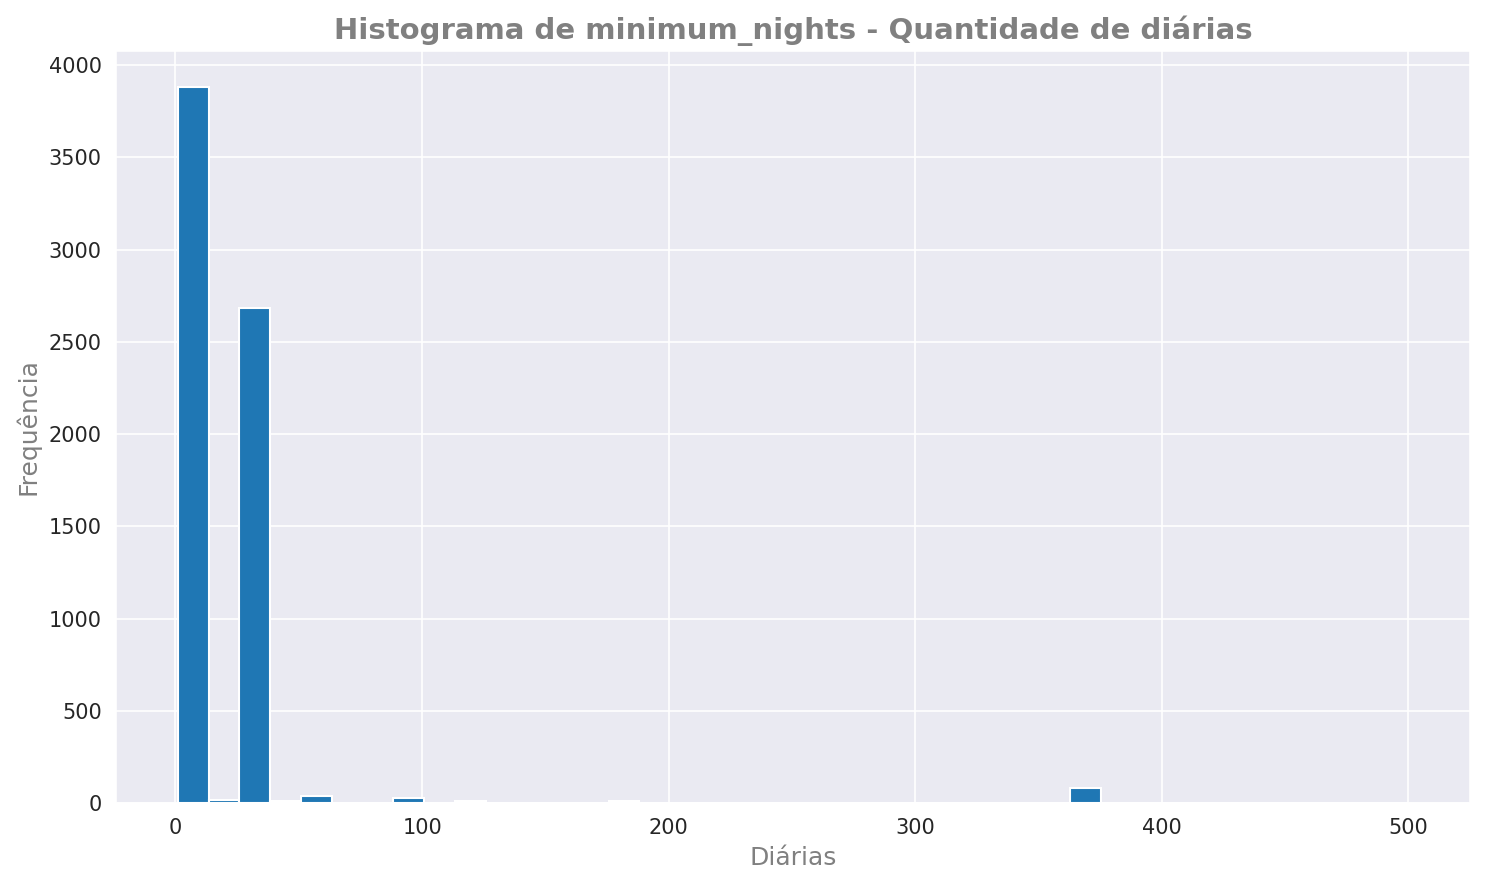

In [14]:
# plotando grafico de histograma para entender o por que minimin_nigths esta tão disperso
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

ax.hist(df['minimum_nights'], bins=40)

ax.set_title(
    'Histograma de minimum_nights - Quantidade de diárias',
    fontsize=14,
    color='gray',
    fontweight='semibold'
)

ax.set_xlabel('Diárias', color='gray', fontsize=12)
ax.set_ylabel('Frequência', color='gray', fontsize=12)

plt.tight_layout()
plt.show()


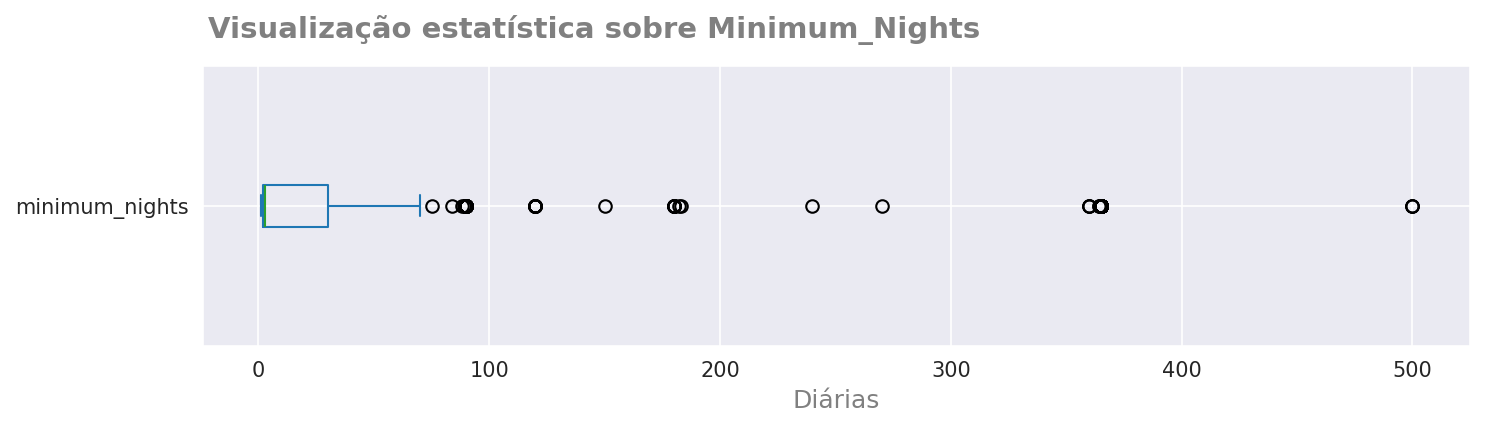

In [ ]:

# 12 - Plotando o boxplot da coluna "minimum_nights"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
df.minimum_nights.plot(kind = "box", vert = False, ax = ax)
ax.text(-22, 1.6, "Visualização estatística sobre Minimum_Nights", color = "grey", fontsize = 14, fontweight = "bold")
ax.set_ylabel("")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
plt.tight_layout()

In [ ]:
# quantidade de locações por periodo de ate 30 dias
print(f'Quantidade total de locações com ate 30 dias pela coluna minimun_nights: {(len(df[df.minimum_nights <= 30]))}. ')
percentual = (len(df[df['minimum_nights'] <= 30]) / df.shape[0]) * 100

print('Percentual de correspondência da base de dados: {:.2f}%'.format(percentual))

Quantidade total de locações com ate 30 dias pela coluna minimun_nights: 6322. 
Percentual de correspondência da base de dados: 93.33%


In [15]:
#realizando uma copia da base de dados

df_copy = df.copy()



In [16]:
# removendo os valores de outliers  da minimun_nigths
df_copy.drop(df_copy[df_copy.minimum_nights > 30].index,axis=0,inplace=True)

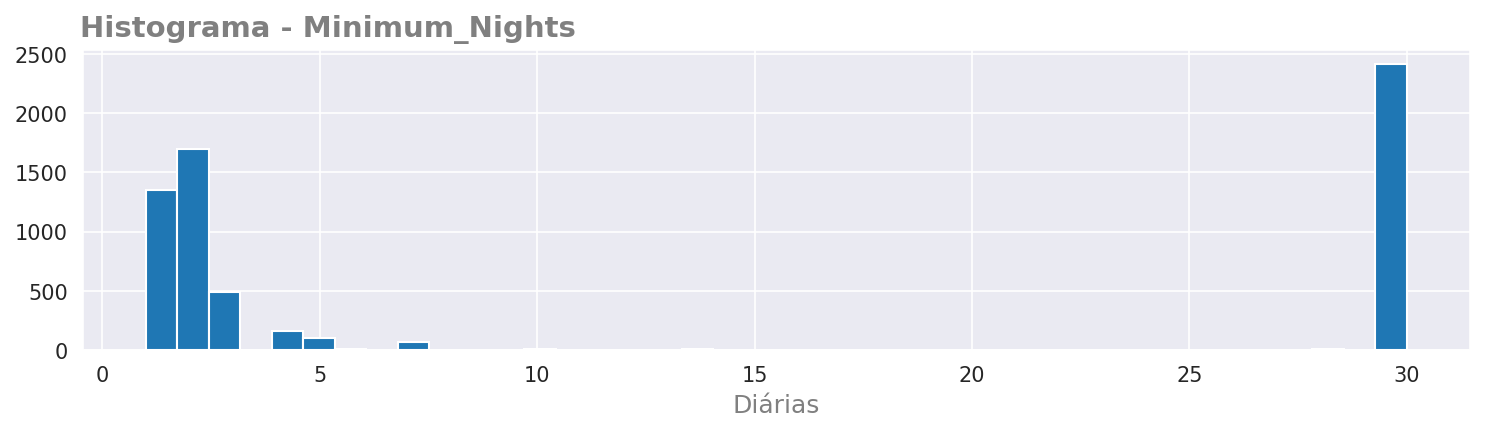

In [17]:
# 17 - Plotando um histograma da coluna "minimum_nights" sem "outliers"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
sns.set_style()
ax.hist("minimum_nights", data = df_copy, bins = 40)
ax.text(-0.5, 2650, "Histograma - Minimum_Nights", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_ylabel("")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
plt.tight_layout()
plt.savefig('histograma.jpeg')

In [18]:
#separando as  bases com maximo e minimo
df_7 = df_copy[df_copy.minimum_nights <= 7]
df_30 = df_copy[df_copy.minimum_nights >  7]

Text(0.5, 0, 'Quantidade de diarias')

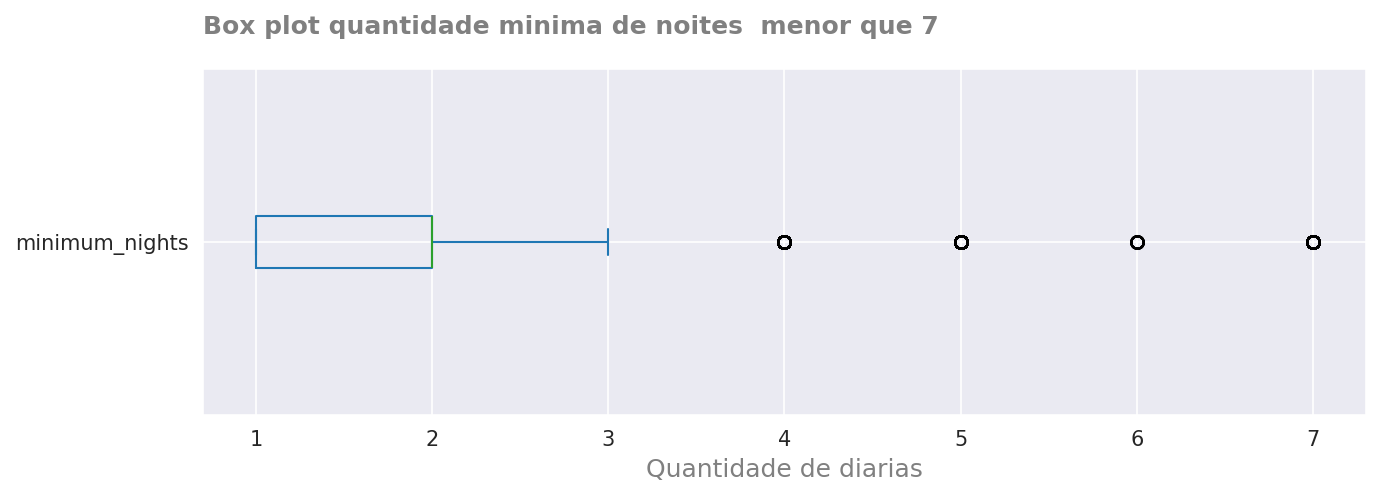

In [19]:
#boxplot para o grupo com 7 dias ou menos
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
df_7.minimum_nights.plot(kind='box',vert=False,ax =ax)
ax.text(0.7,1.6,'Box plot quantidade minima de noites  menor que 7',color='gray', fontsize=12,fontweight='semibold')
ax.set_ylabel('')
ax.set_xlabel('Quantidade de diarias', color='gray', fontsize = 12)

Text(0.5, 0, 'Quantidade de diarias')

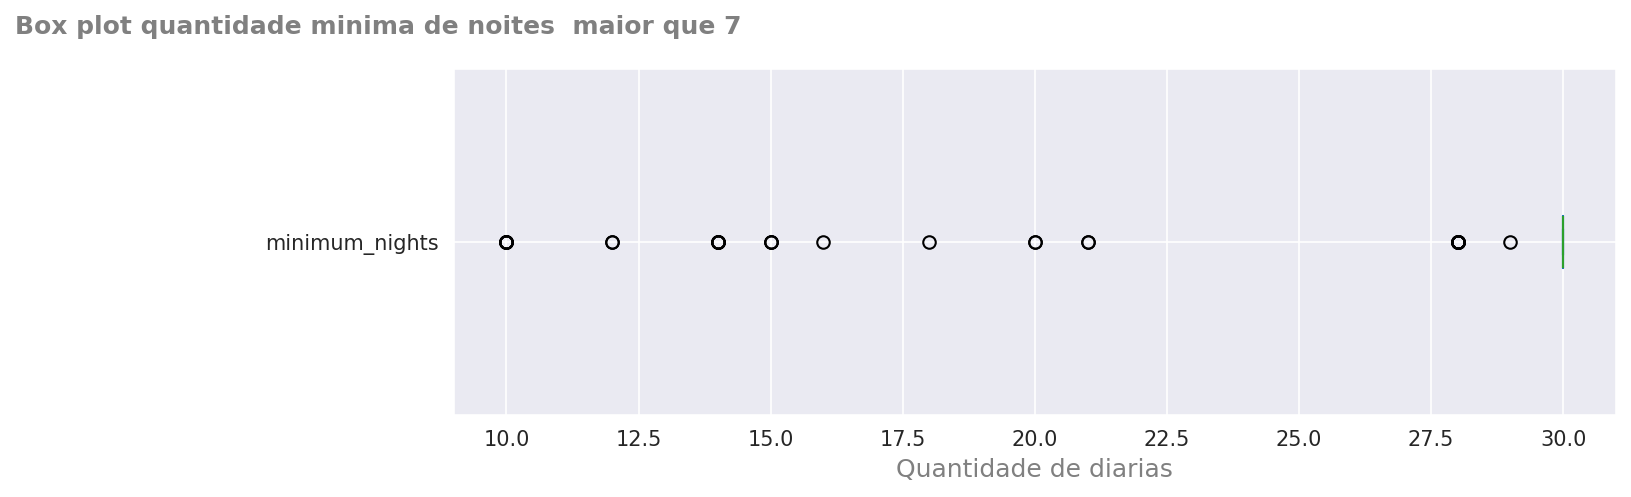

In [20]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
df_30.minimum_nights.plot(kind='box',vert=False,ax =ax)
ax.text(0.7,1.6,'Box plot quantidade minima de noites  maior que 7',color='gray', fontsize=12,fontweight='semibold')
ax.set_ylabel('')
ax.set_xlabel('Quantidade de diarias', color='gray', fontsize = 12)

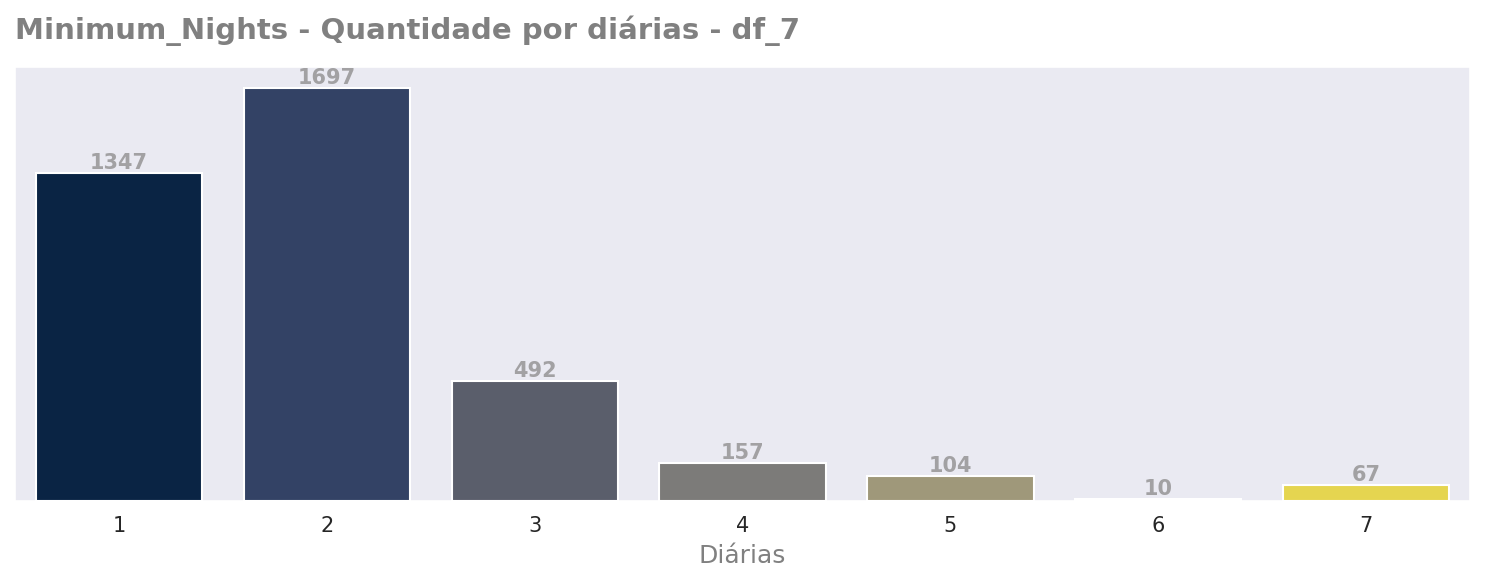

In [23]:

# 20 - Countplot com a contagem por dia
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 4), dpi = 150)
sns.set_style()
barras = sns.countplot(x = "minimum_nights", data = df_7, ax = ax, palette = "cividis",
                       hue = "minimum_nights", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_height()),
              xy = (i.get_x() + i.get_width() / 2,
                    i.get_height()),
              color = "#A2A1A3",
              fontweight = "semibold",
              ha = "center",
              va = "bottom")

plt.gca().axes.get_yaxis().set_visible(False)
ax.text(-0.5, 1900, "Minimum_Nights - Quantidade por diárias - df_7", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
ax.set_ylabel("")
plt.tight_layout()


In [24]:
df_7.neighbourhood.unique()

array(['Presidio Heights', 'Bernal Heights', 'Castro/Upper Market',
       'Potrero Hill', 'Crocker Amazon', 'Inner Sunset', 'Noe Valley',
       'Mission', 'Downtown/Civic Center', 'Bayview', 'Parkside',
       'Seacliff', 'Ocean View', 'Marina', 'Visitacion Valley',
       'Pacific Heights', 'Western Addition', 'Haight Ashbury',
       'West of Twin Peaks', 'South of Market', 'Outer Sunset',
       'Russian Hill', 'Chinatown', 'Twin Peaks', 'Financial District',
       'Nob Hill', 'Outer Richmond', 'Glen Park', 'Excelsior',
       'North Beach', 'Lakeshore', 'Outer Mission', 'Presidio',
       'Inner Richmond', 'Diamond Heights', 'Golden Gate Park'],
      dtype=object)

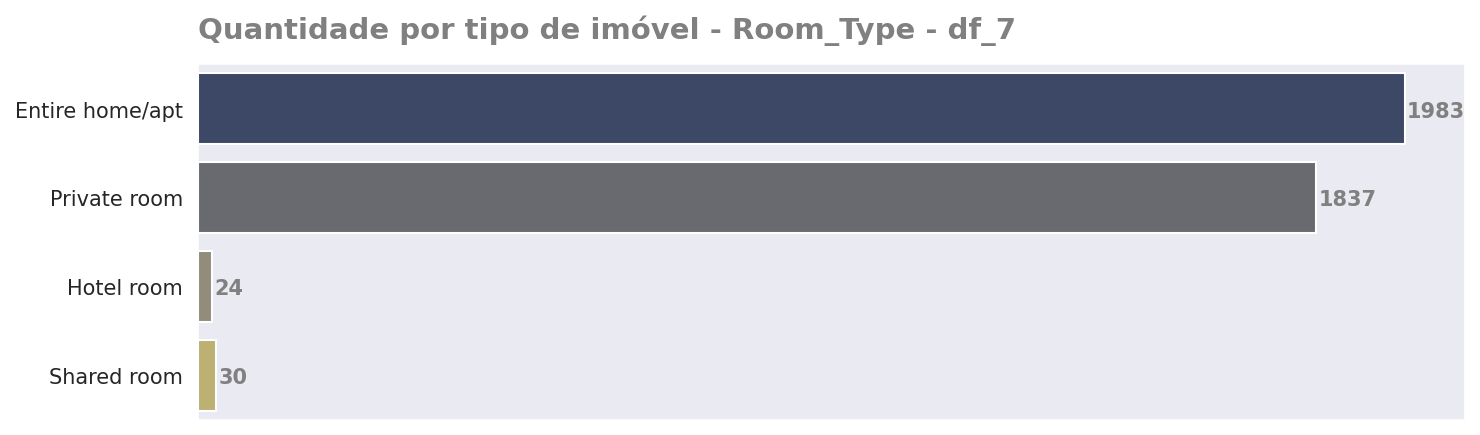

In [25]:
# 22 - Verificando a quantidade de tipo de imóvel para locação na base df_7
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
barras = sns.countplot(y = "room_type", data = df_7, ax = ax, orient = "h", palette = "cividis",
                       hue = "room_type", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = (((i.get_width() + 5) - (i.get_height())),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "grey", fontweight = "bold",
                     ha = "left")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Quantidade por tipo de imóvel - Room_Type - df_7", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()


Text(0, 0.5, '')

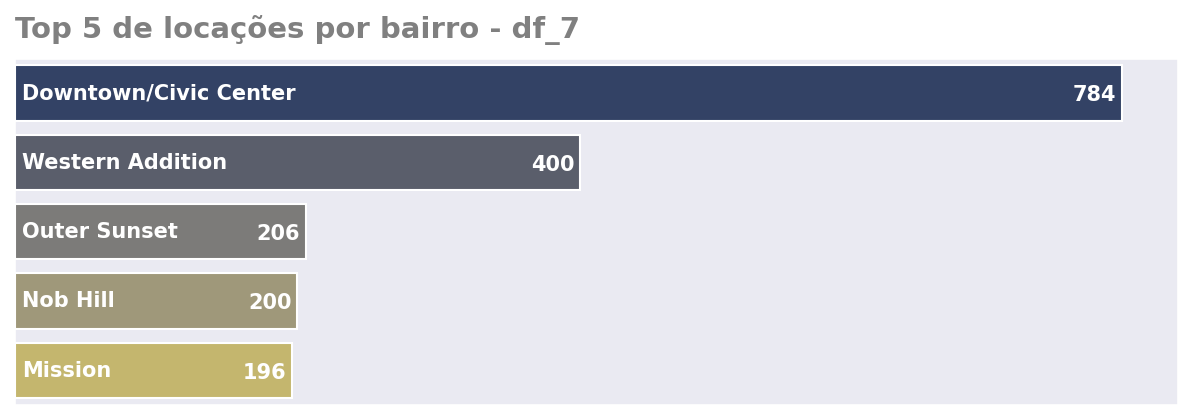

In [27]:
 # 23 - Plotando a quantidade de locações por bairros
imoveis = df_7.groupby(["neighbourhood"]).size().sort_values(ascending = False)[:5]
imoveis = pd.DataFrame(imoveis, columns = ["values"])
imoveis.reset_index(inplace = True)

fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
sns.set_style()
barras = sns.barplot(x = "values", y = "neighbourhood", data = imoveis, ax = ax, palette = "cividis",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = ((i.get_width() - (i.get_height() * 5)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "white", fontweight = "bold",
                     ha = "right")

for i in range(len(imoveis)):
  bairro = imoveis.iloc[i, 0]
  valor = imoveis.iloc[i, 1]
  ax.text(valor - valor + 5, i, bairro, fontsize = 10, fontweight = "bold", color = "white", va = "center")

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
ax.text(0, -0.8, "Top 5 de locações por bairro - df_7", fontsize = 14, color = "grey", fontweight = "bold")

ax.set_xlabel("")
ax.set_ylabel("")

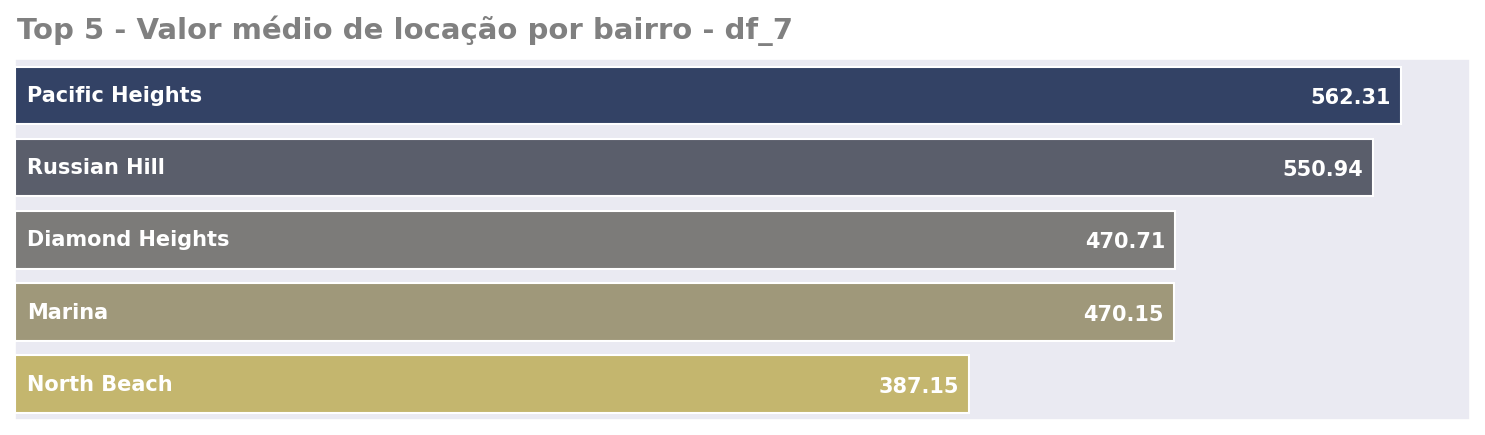

In [28]:
# 24 - Visualizando a "média" de preços por bairros ordenando pelo maior valor
price_mean = round(df_7.groupby(["neighbourhood"]).price.mean().sort_values(ascending = False)[:5], 2)
price_mean = pd.DataFrame(price_mean)
price_mean.reset_index(inplace = True)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)

barras = sns.barplot(x = "price", y = "neighbourhood", data = price_mean, ax = ax, palette = "cividis",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(i.get_width(),
              xy = ((i.get_width() - (i.get_height() * 5)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
              va = "center_baseline",
              color = "white",
              fontweight = "bold",
              ha = "right")

for i in range(len(price_mean)):
  bairro = price_mean.iloc[i, 0]
  valor = price_mean.iloc[i, 1]
  ax.text(valor - valor + 5, i, bairro, fontsize = 10, fontweight = "bold", color = "white", va = "center")

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Top 5 - Valor médio de locação por bairro - df_7", fontsize = 14, color = "grey", fontweight = "bold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()


In [29]:
df_30.neighbourhood.unique()

array(['Inner Richmond', 'Excelsior', 'Castro/Upper Market',
       'South of Market', 'Outer Mission', 'Pacific Heights', 'Marina',
       'Financial District', 'Mission', 'Outer Sunset', 'Potrero Hill',
       'Bernal Heights', 'North Beach', 'Downtown/Civic Center',
       'Western Addition', 'Russian Hill', 'Haight Ashbury', 'Noe Valley',
       'Nob Hill', 'Inner Sunset', 'Parkside', 'Visitacion Valley',
       'Bayview', 'Crocker Amazon', 'Outer Richmond', 'Ocean View',
       'Presidio Heights', 'Glen Park', 'Chinatown', 'Lakeshore',
       'Twin Peaks', 'Diamond Heights', 'West of Twin Peaks', 'Presidio',
       'Seacliff', 'Golden Gate Park'], dtype=object)

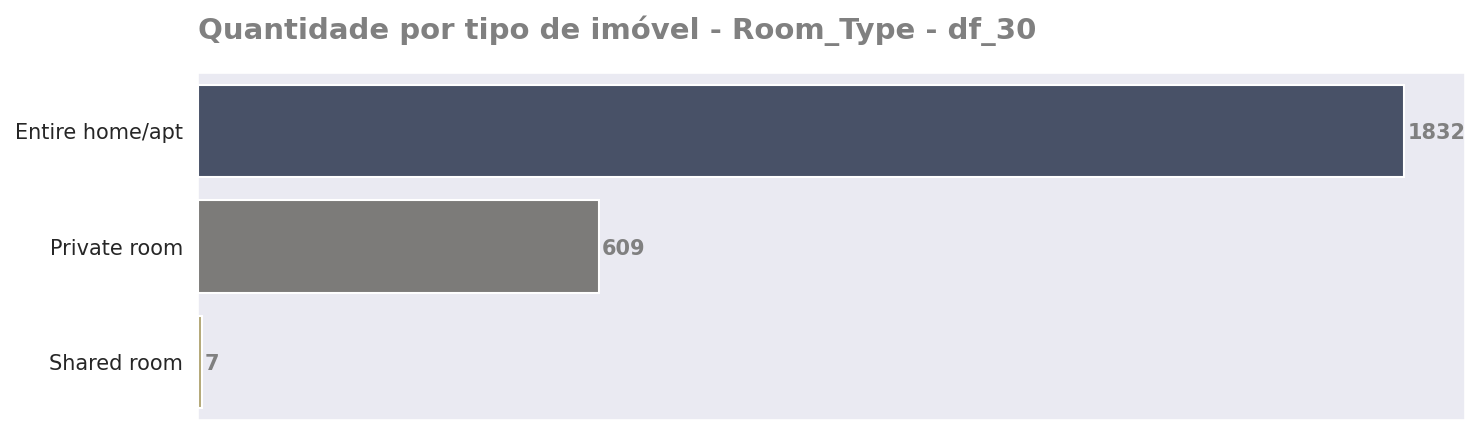

In [30]:

# 26 - Verificando a quantidade de tipo de imóvel para locação na base df_7
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
barras = sns.countplot(y = "room_type", data = df_30, ax = ax, orient = "h", palette = "cividis",
                       hue = "room_type", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = (((i.get_width() + 5) - (i.get_height())),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "grey", fontweight = "bold",
                     ha = "left")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Quantidade por tipo de imóvel - Room_Type - df_30", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

Text(0, 0.5, '')

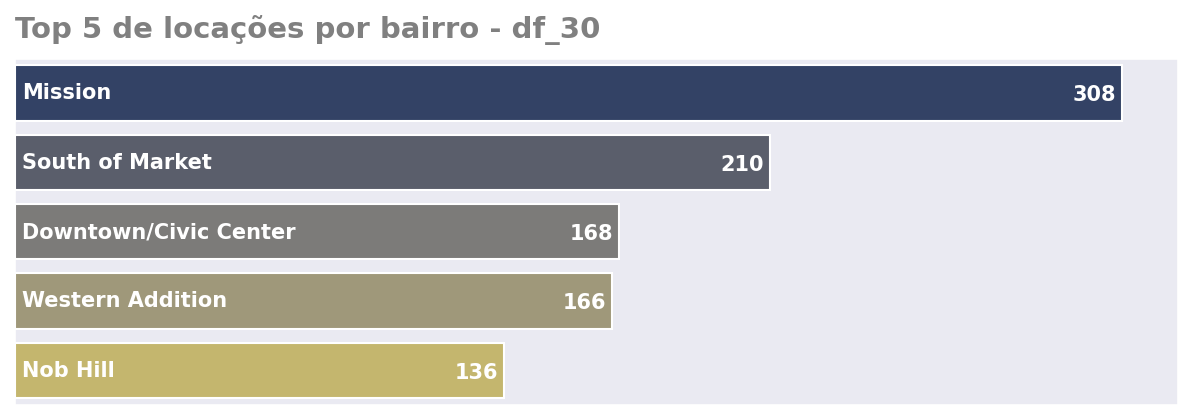

In [31]:
# 27 - Exibindo a "quantidade" de imóveis locados por bairro:
imoveis = df_30.groupby(["neighbourhood"]).size().sort_values(ascending = False)[:5]
imoveis = pd.DataFrame(imoveis, columns = ["values"])
imoveis.reset_index(inplace = True)

fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
sns.set_style()
barras = sns.barplot(x = "values", y = "neighbourhood", data = imoveis, ax = ax, palette = "cividis",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = ((i.get_width() - (i.get_height() * 2)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "white", fontweight = "bold",
                     ha = "right")

for i in range(len(imoveis)):
  bairro = imoveis.iloc[i, 0]
  valor = imoveis.iloc[i, 1]
  ax.text(valor - valor + 2, i, bairro, fontsize = 10, fontweight = "bold", color = "white", va = "center")

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
ax.text(0, -0.8, "Top 5 de locações por bairro - df_30", fontsize = 14, color = "grey", fontweight = "bold")

ax.set_xlabel("")
ax.set_ylabel("")

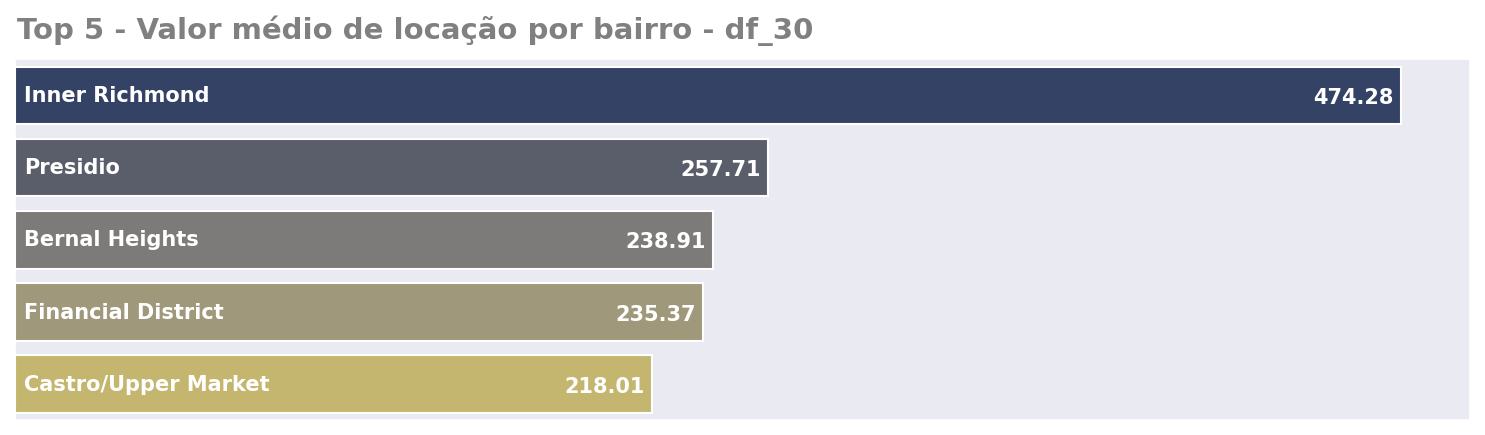

In [32]:

# 28 - Visualizando a "média" de preços por bairros ordenando pelo maior valor
price_mean = round(df_30.groupby(["neighbourhood"]).price.mean().sort_values(ascending = False)[:5], 2)
price_mean = pd.DataFrame(price_mean)
price_mean.reset_index(inplace = True)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)

barras = sns.barplot(x = "price", y = "neighbourhood", data = price_mean, ax = ax, palette = "cividis",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(i.get_width(),
              xy = ((i.get_width() - (i.get_height() * 3)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
              va = "center_baseline",
              color = "white",
              fontweight = "bold",
              ha = "right")

for i in range(len(price_mean)):
  bairro = price_mean.iloc[i, 0]
  valor = price_mean.iloc[i, 1]
  ax.text(valor - valor + 3, i, bairro, fontsize = 10, fontweight = "bold", color = "white", va = "center")

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Top 5 - Valor médio de locação por bairro - df_30", fontsize = 14, color = "grey", fontweight = "bold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()